In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
ch=pd.read_csv('Churn_Modelling.csv')
ch

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
ch.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
inch=ch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [12]:
inch['Gender']=inch['Gender'].map({'Female':0,'Male':1})

C:\Users\Kaila\AppData\Local\Temp\ipykernel_9916\1582706875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inch['Gender']=inch['Gender'].map({'Female':0,'Male':1})


In [19]:
uni=inch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].apply(lambda x : x.unique())
uni

Gender                                                        [0, 1]
Age                [42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...
Tenure                            [2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]
Balance            [0.0, 83807.86, 159660.8, 125510.82, 113755.78...
CreditScore        [619, 608, 502, 699, 850, 645, 822, 376, 501, ...
NumOfProducts                                           [1, 3, 2, 4]
HasCrCard                                                     [1, 0]
IsActiveMember                                                [1, 0]
EstimatedSalary    [101348.88, 112542.58, 113931.57, 93826.63, 79...
dtype: object

In [26]:
type=inch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].apply(lambda x: x.dtype)
type

Gender               int64
Age                  int64
Tenure               int64
Balance            float64
CreditScore          int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [27]:
inch.shape

(10000, 9)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
def model(x,y):
    x = x[:y.shape[0]]
    model = keras.Sequential([
        keras.layers.Dense(50,input_shape=(9,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x,y,epochs=5)
    return model

In [30]:
ouch=ch['Exited']

In [34]:
ouch.shape

(10000,)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train ,Y_text= train_test_split(inch,ouch, test_size=0.2, random_state=42)

In [65]:
X_train.shape

(8000, 9)

In [66]:
Y_train.shape

(8000,)

In [67]:
model= model(X_train,Y_train)

Epoch 1/5


c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5823 - loss: 4243.0454
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6817 - loss: 55.2072
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6998 - loss: 59.5297
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6810 - loss: 62.9770
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6917 - loss: 50.3285


In [68]:
model.evaluate(X_test,Y_text)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8026 - loss: 113.8254


[110.64114379882812, 0.8034999966621399]

In [81]:
y_pred=model.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [77]:
Y_text.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [84]:
y_pred=(y_pred>0.5).astype(int)
print(classification_report(Y_text.tolist(),y_pred.tolist()))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

this artificial neural network that we used the current model is not so good but we can make it good by balancing the dataset
for that we need four methods
undersampling
oversampling
smote
ensemble methods


**UNDERSAMPLING**

In [87]:
ouch.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [102]:
new=pd.concat([inch,ouch],axis=0)
new

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,42.0,2.0,0.00,619.0,1.0,1.0,1.0,101348.88,NaN
1,0.0,41.0,1.0,83807.86,608.0,1.0,0.0,1.0,112542.58,NaN
2,0.0,42.0,8.0,159660.80,502.0,3.0,1.0,0.0,113931.57,NaN
3,0.0,39.0,1.0,0.00,699.0,2.0,0.0,0.0,93826.63,NaN
4,0.0,43.0,2.0,125510.82,850.0,1.0,1.0,1.0,79084.10,NaN
...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [104]:
new0=new[new['Exited']==0]
new0

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [108]:
new0

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [106]:
new1=new[new['Exited']==1]

In [95]:
new1.shape

(2037, 10)

In [97]:
new0=new0.sample(2037)

In [98]:
new0.shape

(2037, 10)

In [99]:
inn=pd.concat([new0,new1],axis=1)

,Gender,Gender
9564,NaN,NaN
8272,NaN,NaN
2138,NaN,NaN
8670,NaN,NaN
564,NaN,NaN
...,...,...
9981,NaN,NaN
9982,NaN,NaN
9991,NaN,NaN
9997,NaN,NaN


CNN is here

In [109]:
(X_train,Y_train),(X_test,Y_text)=keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [110]:
X_train.shape

(50000, 32, 32, 3)

In [111]:
Y_train.shape

(50000, 1)

In [118]:
classes=['airplane',										
'automobile',									
'bird',										
'cat',										
'deer',									
'dog',										
'frog',										
'horse',									
'ship',										
'truck']

In [119]:
def show_image(x,y,index):
    plt.imshow(x[index])
    plt.title('Label: {}'.format(classes[y[index][0]]))
    plt.show()

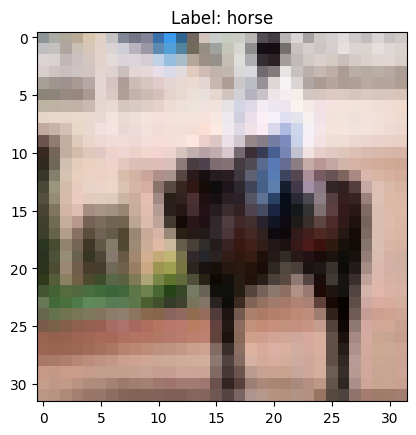

In [121]:
show_image(X_train,Y_train,11)

first ann here then cnn

In [126]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [127]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [128]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1803 - loss: 32.1189
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2503 - loss: 2.1478
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2566 - loss: 2.1101
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2509 - loss: 2.1177
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1935 - loss: 2.1584


In [131]:
pred=model.predict(X_test)
pred=[np.argmax(x) for x in pred]
Y_text

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [132]:
print(classification_report(Y_text,pred))

              precision    recall  f1-score   support

           0       0.18      0.56      0.28      1000
           1       0.13      0.09      0.10      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.16      0.92      0.27      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.17      0.06      0.09      1000

    accuracy                           0.16     10000
   macro avg       0.06      0.16      0.07     10000
weighted avg       0.06      0.16      0.07     10000



c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

"HERE COMES CNN"

In [133]:
cnn= keras.Sequential([
    #cnn
    keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [135]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2913 - loss: 3.1295
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4987 - loss: 1.4141
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5776 - loss: 1.2056
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6345 - loss: 1.0565
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6707 - loss: 0.9510
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6903 - loss: 0.8863
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7198 - loss: 0.8099
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7402 - loss: 0.7625
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7522 - loss: 0.7101
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7650 - loss: 0.6683


In [136]:
cnn.evaluate(X_test,Y_text)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6397 - loss: 1.1612


[1.1662927865982056, 0.6378999948501587]

In [137]:
pre=model.predict(X_test)
pre=[np.argmax(x) for x in pre]
pre

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[6,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 0,
 1,
 6,
 6,
 6,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 1,
 6,
 1,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 1,
 6,
 6,
 0,
 0,
 6,
 0,
 1,
 6,
 6,
 6,
 6,
 9,
 6,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 1,
 6,
 1,
 0,
 6,
 0,
 0,
 9,
 6,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 9,
 6,
 0,
 0,
 6,
 6,
 0,
 6,
 1,
 6,
 0,
 6,
 0,
 1,
 6,
 6,
 6,
 0,
 0,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 6,
 6,
 6,
 6,
 0,
 0,
 1,
 0,
 9,
 6,
 6,
 6,
 0,
 6,
 0,
 1,
 1,
 6,
 6,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 6,
 6,
 0,
 0,
 6,
 6,
 9,
 6,
 0,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 9,
 6,
 0,
 0,
 6,
 0,
 6,
 0,
 6,
 6,
 0,
 6,
 0,
 1,
 1,
 1,
 6,
 1,
 0,
 1,
 6,
 6,
 6,
 0,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 1,
 0,
 0,
 6,
 6,
 1,
 6,
 1,


In [138]:
print(classification_report(Y_text,pre))

              precision    recall  f1-score   support

           0       0.18      0.56      0.28      1000
           1       0.13      0.09      0.10      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.16      0.92      0.27      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.17      0.06      0.09      1000

    accuracy                           0.16     10000
   macro avg       0.06      0.16      0.07     10000
weighted avg       0.06      0.16      0.07     10000



c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

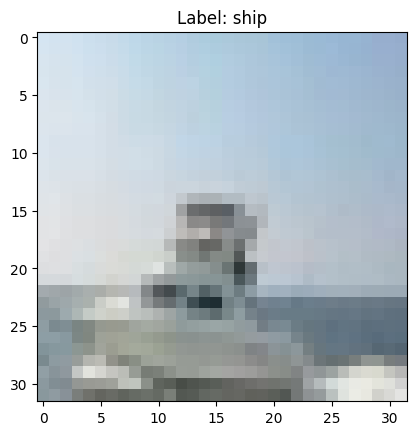

In [139]:
show_image(X_train,Y_train,100)

In [142]:
y=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [158]:
classes[np.argmax(y[14])]

'truck'

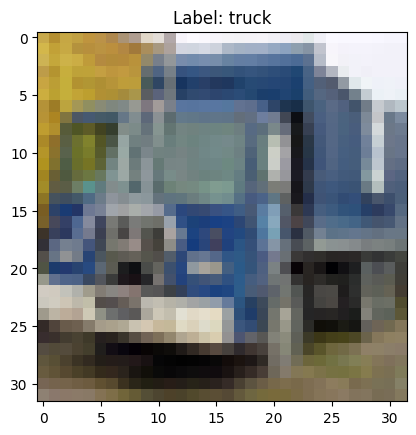

In [157]:
show_image(X_test,Y_text,14)